
## Newton's Law of Cooling
### PH 212 COCC
#### Bruce Emerson 7/27/20

Now that we have a data logger working and we know how to get .csv data entered into our Jupyterlab notebooks it's time to start doing some science with that data. For this lab you will need to have a temperature sequence of a cooling object that goes for 15 min or so. Longer if you want. 

I found that if I take the data points too close together in time the data has lots of 'hops' in it which makes analysis harder. Even when I stretch things out a bit more (60 s between measurements) it still isn't smooth which is a good introduction to real data. I'll give examples of both in this notebook.


## The Experiment

Here's how I generated my data. I boiled some water in my kettle. I poured the water into a mug which had the TMP36 sensor taped to the outside of the mug. I then covered the mug with a chunk of insulation to limit the heat loss through the surface.  

To start the data gathering I hit the reset button on my Arduino which had already been loaded with the data logger sketch. Because I didn't have to do this remotely I had my Arduino attached to my computer and I watched the data gathering process on the serial monitor.   

When the data gathering was done I copied and pasted the data from the file on the SD card into a txt document, imported that file into a spreadsheet (using commas as the delimiter, and then saved the spreadsheet as a .csv file. This is the process which has been working best for me on my computer.


## Your Lab

For your lab you need to explore this guide thoroughly and then upload your own data file gathered from the experiment described above and complete all the same analyses. I will be looking at your plots and your conclusions when I evaluate the labs.

### Dependencies

The new dependency here is the [Pandas](https://pandas.pydata.org/) library which was developed to support data science applications in python. It is classically imported with the alias pd. It is installed as part of your Anaconda package. When you update Anaconda you can also update Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

## Upload the data!!

Read in your .csv data file. Note that pd.read_csv will also number the lines which I already had in my data set. Remember from our previous discussion that the DataFrame (which is what the read_csv function creates has  various attributes that include the columns of data labeled by the descriptors in the header row. For me I read in two data sets to illustrate some of the potential concerns. In both cases I have about 1500 s of data (roughly 15 min). One has 300 data points and the other only 30.  

### NOTE:

When I save my data as a .csv file from a spreadsheet it uses a tab instead of a comma to separate the columns. Not surprisingly there is an argument for that! You'll notice the ```sep = '\t'``` argument which tells the read_csv function to expect a tab instead of a comma as a separator. If your .csv file is actually comma separated you can remove this argument.

In [27]:
dataBruce = pd.read_csv('data/anothercool2.csv',sep='\t')
print(dataBruce)
dataSmooth = pd.read_csv('data/nextcool.csv',sep='\t')
print(dataSmooth)

     data  time(s)  temperature(C)
0       0     0.07           58.89
1       1     5.12           58.89
2       2    10.15           58.89
3       3    15.17           58.40
4       4    20.19           58.40
..    ...      ...             ...
295   295  1482.34           49.61
296   296  1487.36           50.59
297   297  1492.39           50.59
298   298  1497.41           50.59
299   299  1502.43           49.61

[300 rows x 3 columns]
    data  time(s)  temperature(C)
0      0     0.95           63.28
1      1    61.00           64.75
2      2   121.03           65.23
3      3   181.05           64.75
4      4   241.08           64.26
5      5   301.10           63.28
6      6   361.12           62.30
7      7   421.15           62.30
8      8   481.17           61.33
9      9   541.20           60.35
10    10   601.22           60.84
11    11   661.24           59.86
12    12   721.27           59.86
13    13   781.29           59.86
14    14   841.31           59.86
15    15   9

## Fine Grain Data

This is the fine grain data I tool. Fine grain means that I was taking temperature data often and, one might argue, more often than needed. Mostly what is seen are tiny variations in the analog data read from the TMP36 which make it appear that the data has changed but it probably hasn't. You can imagine drawing a line through the core of the data which is likely to be more meaningful or one can just take data less often. See the next plot....

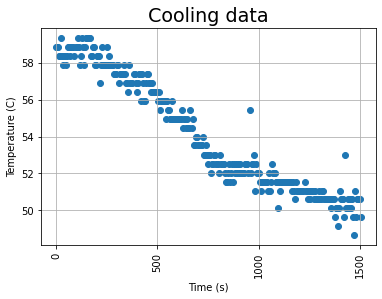

In [3]:
# code cell that creates the plot
dataTime = dataBruce['time(s)']
dataTemp = dataBruce['temperature(C)']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data')
ax.grid()

fig.savefig("myplot.png")
plt.show()

## Courser Grain Data

In this data set I took data every 60s instead of every 5s in the previous data set. Here is what the data looks like.

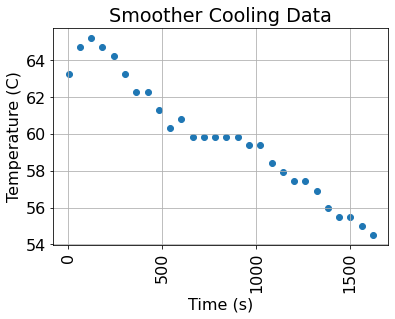

In [26]:
# code cell that creates the plot
dataTimeS = dataSmooth['time(s)']
dataTempS = dataSmooth['temperature(C)']
fig, ax = plt.subplots()
ax.scatter(dataTimeS, dataTempS)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Smoother Cooling Data')
ax.grid()

fig.savefig("myplot.png")
plt.show()

## Exploring Data

In science classes we often use data to confirm some discussion or formula that came up in class. As we have talked about in lab it all starts with the data. When we consider the data we should start simple and build towards complexity. In this case the data looks pretty linear so we will start there 



## Put a Line On It!

We learned how to use the polynomial fit routine last term in the Rock Drop lab among others. For a line we just do a fit with degree 1. Always look at the output of the process and make sure it is reasonable. Is it reasonable that the y intercept is 59 C and the slope is - .0067 ish? (for me this is almost exactly what I estimated)

After we find the coefficients of the polynomial then we generate the actual model data using the same process we did in the past. The only major difference is that I have added the model data to the data frame (from pandas) as a new column labeled ```'modelT'```  


In [5]:
degree = 1
coefs1 = ply.polyfit(dataTime, dataTemp,degree)
print("Fit to polynomial of deree; ", degree)
print("Coefficients of polynomial fit:", coefs1)

Fit to polynomial of deree;  1
Coefficients of polynomial fit: [ 5.92169089e+01 -6.78822650e-03]


In [6]:
# find number of data points and create model array
numPoints = len(dataTime)
modelTemp = np.full_like(dataTime,0)

# calculate the temperatures  predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTemp[i] = coefs1[0] + coefs1[1]*dataTime[i]

# add model array to data frame
dataBruce['modelT'] = modelTemp
    
# print(modelTemp)
# dataBruce['modelT']

### ...actual plot...

Note that I don't have to redefine the original data arrays that I plotted I just need to add the model temperatures. I included the original process as comments for clarity. Then I scatter plot both sets of data one at a time.

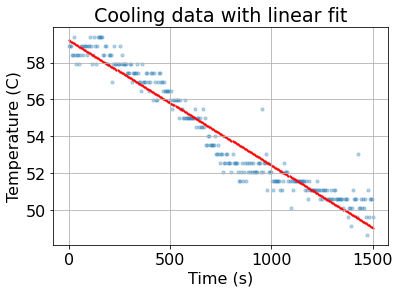

In [7]:
# set up data arrays for plots
# first two are already defined earlier but included here as comments
# for clarity
# dataTime = dataBruce['time(s)']
# dataTemp = dataBruce['temperature(C)']
dataModel = dataBruce['modelT']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s= 10, alpha = .3)
ax.scatter(dataTime, dataModel, s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with linear fit')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

## What to Notice

I hope what you notice in the previous plot is that the slope of my model is too small at the beginning and too steep (large) at the end. There is the wierdness in my data there in the middle but still it seems like a solid conclusion.

What to do for a better fit? We could go to a quadratic fit and see.... it's all pretty straightforward since we already have the code. Please change the variable names to keep things tidy.

Fit to polynomial of deree;  2
Coefficients of polynomial fit: [ 6.00312671e+01 -1.00509021e-02  2.17156602e-06]


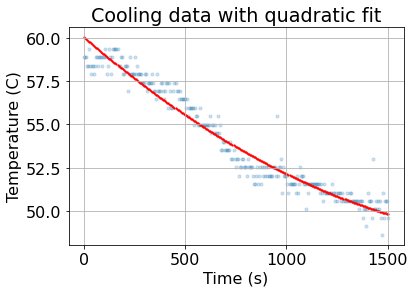

In [8]:
degree = 2
coefs2 = ply.polyfit(dataTime, dataTemp,degree)
print("Fit to polynomial of deree; ", degree)
print("Coefficients of polynomial fit:", coefs2)

# find number of data points and create model array
numPoints = len(dataTime)
modelTemp2 = np.full_like(dataTime,0)

# calculate the temperatures  predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTemp2[i] = coefs2[0] + coefs2[1]*dataTime[i] +coefs2[2]* dataTime[i]**2

# add model array to data frame
dataBruce['modelTquad'] = modelTemp2
    
# print(modelTemp2)
# dataBruce['modelTquad']

# set up data arrays for plots
# dataTime = dataBruce['time(s)']
# dataTemp = dataBruce['temperature(C)']
# dataModel = dataBruce['modelT']
dataModelQ = dataBruce['modelTquad']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 10, alpha = .2)
# ax.scatter(dataTime, dataModel)
ax.scatter(dataTime, dataModelQ , s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with quadratic fit')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

## Exponential Model

In MTH 256 you will explore a class of differential equations which are first order equations that describe things like population growth, interest bearing accounts, and heat flow. The solution to these problems has the general form...

$$ \Large T(t) = Ae^{kt} + C$$


...where T is the temperature and t is the time. C is the value of the function at t = infinite which would normally be room temperature. A is the initial value of the temperature relative to room temperature. k is the parameter that controls the curvature of the function. Let's try this out.



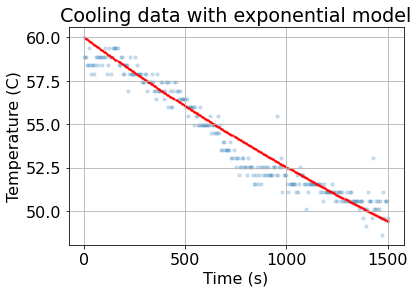

In [9]:
# find number of data points and create model array
# numPoints = len(dataTime)
modelTempExp = np.full_like(dataTime,0)

# parameters in the exponential model
verticalOffset = 25. # moves the plot up and down
initialValue = 35.  # combined with previous offset gives initial value
konstant = .00024  # controls rate at which plot bends.

# calculate the temperatures predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTempExp[i] = verticalOffset + initialValue*np.exp(-konstant*dataTime[i]) 

# add model array to data frame
dataBruce['modelTExp'] = modelTempExp

# set up data arrays for plots
# dataTime = dataBruce['time(s)']
# dataTemp = dataBruce['temperature(C)']
# dataModel = dataBruce['modelT']
# dataModelQ = dataBruce['modelTquad']
dataModelExp = dataBruce['modelTExp']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 10, alpha = .2)
#ax.scatter(dataTime, dataModelQ , color = 'green', linewidth = '0')
ax.scatter(dataTime, dataModelExp , s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with exponential model')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

## How the Models Diverge

Now we have roughly explored three models for our data. A linear model, a quadratic model, and an exponential model. They all are reasonable (possibly) approximations of the data. How might we discern which is a better model? One way to approach the question is to ask what would happen if I had more data. We can consider this by extending our existing models beyond the limits of our current data set and make predictions.



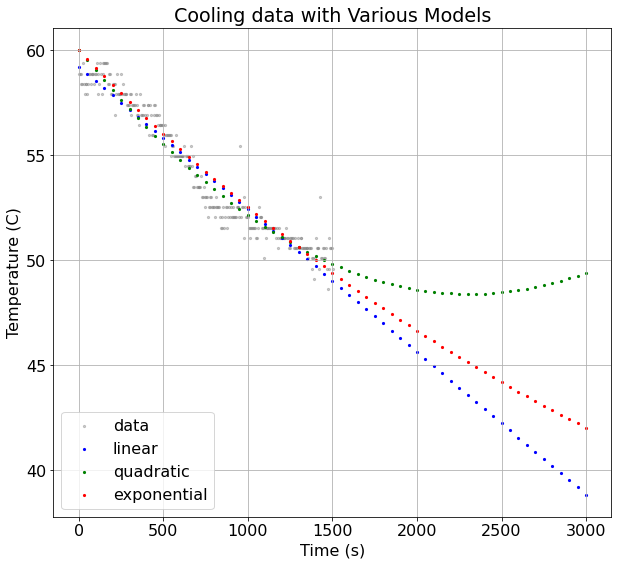

In [25]:
# setting up parameters of extended model
maxTime = 3000 # maximum desired time in s
numData = 61   # number of data points to generate across the time span
modelTime = np.linspace(0.,maxTime,numData) 

modelLinear = np.full_like(modelTime,0)
modelQuad = np.full_like(modelTime,0)
modelExp = np.full_like(modelTime,0)

# generate temperatures for extended lines
for i in range (0,numData):
    modelLinear[i] = coefs1[0] + coefs1[1]*modelTime[i]
for i in range (0,numData):
    modelQuad[i] = coefs2[0] + coefs2[1]*modelTime[i] +coefs2[2]* modelTime[i]**2
for i in range (0,numData):
    modelExp[i] = verticalOffset + initialValue*np.exp(-konstant*modelTime[i]) 
    
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 5, color = 'grey', alpha = .4, label = 'data')
ax.scatter(modelTime, modelLinear, s = 10, color = 'blue', linewidth = '0', label = 'linear')
ax.scatter(modelTime, modelQuad , s = 10, color = 'green', linewidth = '0', label = 'quadratic')
ax.scatter(modelTime, modelExp , s = 10, color = 'red', linewidth = '0',label = "exponential")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with Various Models')
ax.grid()
ax.legend(loc= 3)
fig.set_size_inches(10, 9)

#fig.savefig("myplot.png")
plt.show()

## Conclusions:

As a result of what you see on the plot how much longer will you need to gather data to begin to distinguish among the various models we have proposed? Be sure to look at the scatter in the data (because it's real data) in making this determination. 

For my data I would argue that another 500 s will tell me whether the quadratic model is still viable and probably close to 1000 s more to be able to confidently distinguish between the linear and exponential models.